In [1]:
# If this notebook is in a subdirectory of the project's root,
# update the PYTHONPATH to be able to import as usual
import os, sys
project_root = os.path.dirname(os.path.abspath(''))
sys.path.append(project_root)

In [2]:
# Standard Imports
import torch
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from itertools import cycle
from copy import deepcopy
import os

# Project Imports
from train import setup
from utils import save_path

In [3]:
hs = np.array([0.8, 0.4, 0.2, 0.1, 0.05])
methods = ['euler-forw', 'midpoint', 'euler-symp']
SAVE_DIR_PREFIX = '/results/experiment-'

## Outsource the generation of a single plot

In [4]:
def plot_loss(axes, args, save_dir_prefix=SAVE_DIR_PREFIX):
    N = len(hs)
    step = 0.7/N
    color_dict = {'euler-forw': [plt.cm.Blues(0.8 - step*i) for i in range(N)],
                  'euler-symp': [plt.cm.Oranges(0.8 - step*i) for i in range(N)],
                  'midpoint': [plt.cm.Purples(0.8 - step*i) for i in range(N)]}
    
    for method in methods:
        colors = color_dict[method]
        for i, h in enumerate(hs):
            # Setup desired args
            args = setup(args | {'loss_type': method, 'h': h}, save_dir_prefix=save_dir_prefix)

            # Load loss log
            spath = save_path(args)
            if not os.path.exists(spath):
                print(f"WARNING: file doesn't exist: {spath}")
                continue
            
            saved_dict = torch.load(save_path(args), map_location=torch.device('cpu'))
            loss_dict = saved_dict['stats']
            train_loss = loss_dict['train_loss']
            test_loss = loss_dict['test_loss']

            c = colors[i]
            axes.plot(train_loss, "--", color=c)#, label='train loss')
            axes.plot(test_loss, color=c)#, label='test loss')
            
            axes.set_yscale('log')
            axes.set_xlabel("Training Epoch")
            axes.set_ylabel(r"Loss $\mathcal L$")
            axes.set_title(f"{print_name[args.name]}: Training and Test Losses")
    
    # TODO Customize Legend
    custom_lines = [Line2D([0], [0], color=color_dict[method][0], lw=2) for method in methods]
    legend = axes.legend(custom_lines, [print_method[method] for method in methods], loc='upper right')
    legend.get_frame().set_facecolor('0.8')  # fill the legend dark grey
    legend.get_frame().set_linewidth(0.0)  # remove the black border

## Begin Plotting Code

In [5]:
from visualize import *
mpl.rcParams.update(params)
%matplotlib inline

In [6]:
# TESTING: The below needs all methods for one problem
#hs = np.array([0.1])
#methods = ['euler-symp']
#fig, axes = plt.subplots()
#plot_loss(axes, default_args | {'name': 'twobody'})
#plt.show()

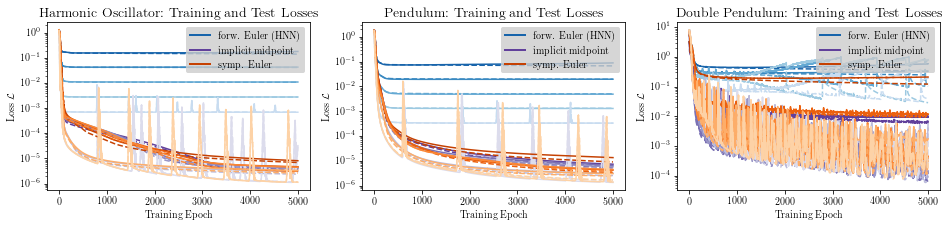

In [8]:
# PLOT ALL TOGETHER
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(16, 5*golden_ratio))
fig.subplots_adjust(wspace=0.2, hspace=0.4)

plot_loss(ax1, default_args | {'name': 'spring'}, save_dir_prefix='/results/experiment-')
plot_loss(ax2, default_args | {'name': 'pendulum'}, save_dir_prefix='/results/experiment-')
plot_loss(ax3, default_args | {'name': 'double-pendulum'}, save_dir_prefix='/results-save/experiment-')
#plot_loss(ax3, default_args | {'name': 'fput'})

fig.savefig("losses.pdf", format='pdf', bbox_inches='tight')